# Cyclistic Bicycle Sharing

The Google Data Analytics Certification tasks everyone with a final case study to complete. This will demonstrate knowledge and skills learned throughout the course. 

They offer two options:
* Cyclistic bicycle sharing dataset
* Your own dataset of choice

In the past I've already completed a few projects of my own, so I wanted to check out the dataset they provided on Cylistic.

The scenario is I am a junior data analyst working at Cyclistic, a bike sharing company located in Chicago, Illinois. The team wants to understand how users are renting out bikes. Members and casual riders use their bike sharing program differently, and the goal is to find out how.

With the insights provided, we'll design a new marketing strategy so that we can potentially get casual riders to become members.

Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. Cyclistic launched in 2016, their bicycles are geotracked and locked into the nearly 700 stations throughout Chicago. Their bicylces are meant to be unlocked from one station and then can be returned to any station in the system.

One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. 

Although the pricing flexibility helps Cyclistic attract more customers, maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, there should be a very good chance to convert casual riders into members. 

### These three questions will guide the future marketing program:

* How do annual members and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import missingno as msno
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [2]:
# Columns needed to be parsed as datetime
dates = [
            
            "started_at",
            "ended_at",
            "end_date"
]

# Drop columns
cols_to_drop = ["Year","start_time","end_time"]

# Read csv
df = pd.read_csv("bicycle_sharing_cleaned.csv",parse_dates=dates).drop(cols_to_drop,axis=1)

# Convert columns to category for lower memory usage
df[["rideable_type","member_casual"]] = df[["rideable_type","member_casual"]].astype("category")

# Calculate the length of each ride by time
df["ride_length"] = df["ended_at"] - df["started_at"]

# This will remove any incorrect data by re-assigning the dataframe that exludes anything less than 0 minutes
df = df[df["ride_length"] >= "00:00:00"]

df["year"] = df["started_at"].dt.year

In [3]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,start_date,end_date,start_month,end_month,ride_length,year
0,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,2020-04-26,2020-04-26,April,April,0 days 00:26:49,2020
1,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,member,2020-04-17,2020-04-17,April,April,0 days 00:08:09,2020
2,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,2020-04-01,2020-04-01,April,April,0 days 00:14:23,2020
3,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,member,2020-04-07,2020-04-07,April,April,0 days 00:12:12,2020
4,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,2020-04-18,2020-04-18,April,April,0 days 00:52:55,2020


In [4]:
df.describe()

,ride_length,year
count,14747526,14747526.00
mean,0 days 00:22:11.721441955,2021.23
std,0 days 03:17:23.954350290,0.80
min,0 days 00:00:00,2020.00
25%,0 days 00:06:29,2021.00
50%,0 days 00:11:40,2021.00
75%,0 days 00:21:24,2022.00
max,40 days 18:40:02,2023.00


In [5]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14747526 entries, 0 to 14758112
Data columns (total 12 columns):
 #   Column              Dtype          
---  ------              -----          
 0   rideable_type       category       
 1   started_at          datetime64[ns] 
 2   ended_at            datetime64[ns] 
 3   start_station_name  object         
 4   end_station_name    object         
 5   member_casual       category       
 6   start_date          object         
 7   end_date            datetime64[ns] 
 8   start_month         object         
 9   end_month           object         
 10  ride_length         timedelta64[ns]
 11  year                int64          
dtypes: category(2), datetime64[ns](3), int64(1), object(5), timedelta64[ns](1)
memory usage: 5.4 GB


### How do annual members and casual riders use Cyclistic bikes differently?

In [6]:
# Users who are members of Cyclistic
members = df[df["member_casual"]== "member"]

# Casual riders
casual = df[df["member_casual"]== "casual"]

In [7]:
df["day_name"] = df["started_at"].dt.day_name()

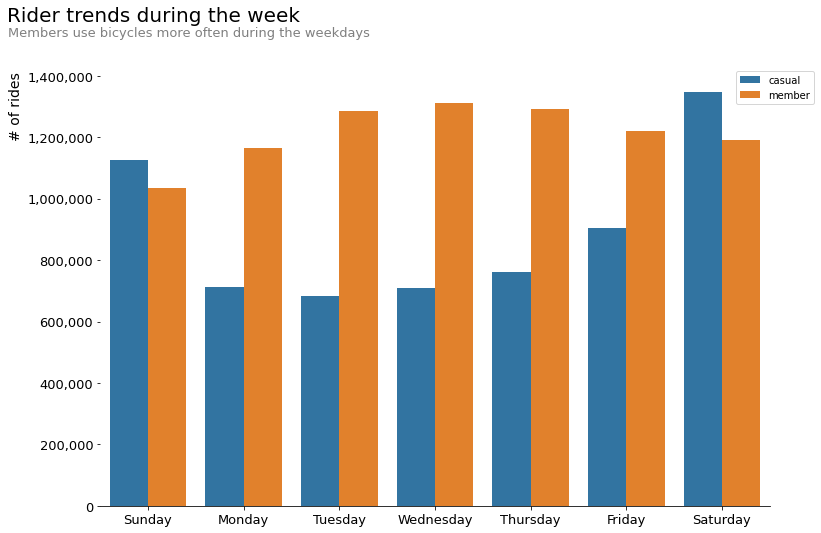

In [40]:
number_rides = df.groupby("day_name", as_index=False)["member_casual"].value_counts()

day_categories = [
    "Sunday", 
    "Monday",
    "Tuesday", 
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday"
]

number_rides["day_name"] = pd.Categorical(number_rides["day_name"], categories = day_categories)

number_rides = number_rides.sort_values(by = "day_name")

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set x axis ticks with commas
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))



sns.barplot(data = number_rides, x = "day_name", y = "count", hue = "member_casual")
sns.despine(left = True)
plt.xlabel("")
plt.ylabel("# of rides", loc = "top", size = 14)
plt.legend(bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=0)
plt.title("Rider trends during the week", x = 0.08, y = 1.1, size = 20)
plt.text(x = -1.46, y = 1530000, s ="Members use bicycles more often during the weekdays", size = 13, color = "grey")

plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

In [9]:
members

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,start_date,end_date,start_month,end_month,ride_length,year
0,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,2020-04-26,2020-04-26,April,April,0 days 00:26:49,2020
1,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,member,2020-04-17,2020-04-17,April,April,0 days 00:08:09,2020
2,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,2020-04-01,2020-04-01,April,April,0 days 00:14:23,2020
3,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,member,2020-04-07,2020-04-07,April,April,0 days 00:12:12,2020
5,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,member,2020-04-30,2020-04-30,April,April,0 days 00:05:24,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
14758103,classic_bike,2023-02-07 07:41:15,2023-02-07 07:51:10,Clark St & Wrightwood Ave,Sheffield Ave & Waveland Ave,member,2023-02-07,2023-02-07,February,February,0 days 00:09:55,2023
14758107,electric_bike,2023-02-04 17:52:34,2023-02-04 17:59:57,Clark St & Wrightwood Ave,Sheffield Ave & Waveland Ave,member,2023-02-04,2023-02-04,February,February,0 days 00:07:23,2023
14758108,classic_bike,2023-02-08 21:57:22,2023-02-08 22:08:06,Clark St & Wrightwood Ave,Sheffield Ave & Waveland Ave,member,2023-02-08,2023-02-08,February,February,0 days 00:10:44,2023
14758109,electric_bike,2023-02-19 11:29:09,2023-02-19 11:39:11,Ogden Ave & Roosevelt Rd,Delano Ct & Roosevelt Rd,member,2023-02-19,2023-02-19,February,February,0 days 00:10:02,2023


In [16]:
data = df.groupby("start_date",as_index=False)["member_casual"].value_counts()

In [28]:
data["start_date"] = pd.to_datetime(data["start_date"])

In [29]:
data

,start_date,member_casual,count
0,2020-04-01,member,1893
1,2020-04-01,casual,399
2,2020-04-02,member,2060
3,2020-04-02,casual,548
4,2020-04-03,member,2570
...,...,...,...
2119,2023-02-26,casual,2169
2120,2023-02-27,member,5091
2121,2023-02-27,casual,1484
2122,2023-02-28,member,8232


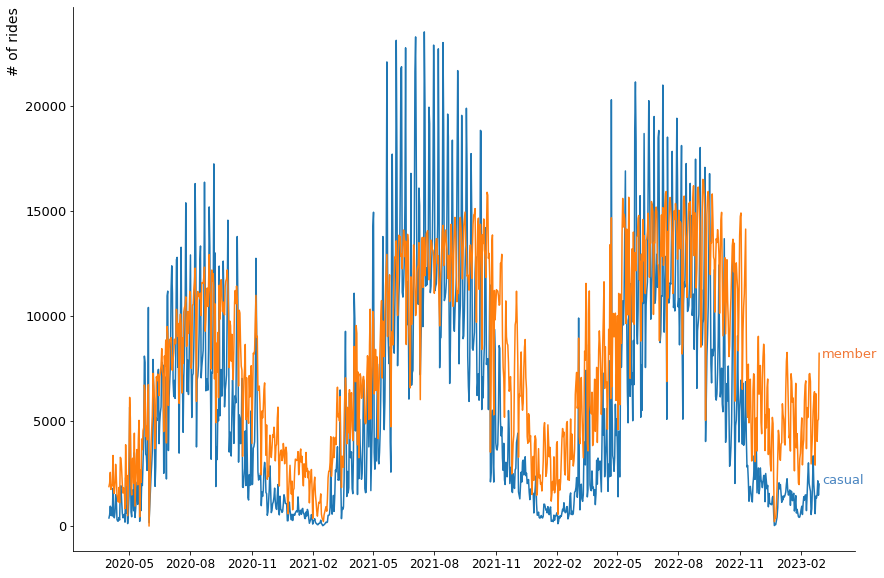

In [88]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.lineplot(data = data, x = "start_date", y = "count", hue = "member_casual")
#plt.xticks(np.arange(2020, 2023))

import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

sns.despine()
plt.xlabel("")
plt.ylabel("# of rides", loc = "top", size = 14)
plt.legend(bbox_to_anchor=(0.95, 1), loc='upper left', borderaxespad=0)
plt.xticks(size = 12)
plt.yticks(size = 13)
plt.legend([], [], frameon=False)
plt.text(x=19420, y=8000, s ="member", color = "#f17837", size = 13)
plt.text(x=19420, y=2000, s ="casual", color = "#4B86C1", size = 13)
plt.show()